### ДЗ № 1 "ПЕРЦЕПТРОН"

##### Преподаватель: Алексей Миронов, Екатерина Апраксина

#### 1. Реализовать обучение линейной регрессии для задачи boston house prices (www.kaggle.com...use-prices) с использованием torch’а


In [51]:
import sklearn
import pandas as pd

import torch
import torch.nn as nn
from torch import autograd
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import init
import torch.optim as optim
import torchvision as tv
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from sklearn.datasets import load_boston
data = load_boston()
X = data.data
y = data.target

In [42]:
df = pd.DataFrame(X, columns=data.feature_names)
df['PRICE'] = y
print(len(df.columns))
df.head()

14


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
#Готовим выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, shuffle=True)
len(X_train), len(y_train), len(X_test), len(y_test)

(354, 354, 152, 152)

In [867]:
#создаем тензоры
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).view(-1).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).view(-1).float()

#генерируем бачи
batch_size = 10
dataset    = TensorDataset(X_train, y_train)
data_iter  = DataLoader(dataset, batch_size, shuffle=True)

In [107]:
inputs_number = 13
model = nn.Sequential(
    nn.Linear(in_features=13, out_features=1, bias=True)
)
print (model) # Просмотр структуры сети

Sequential(
  (0): Linear(in_features=13, out_features=1, bias=True)
)


In [108]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.0951,  0.2145, -0.1600,  0.0322, -0.0336, -0.0971,  0.0944,  0.0818,
         -0.1470,  0.1908,  0.1402, -0.1017, -0.1115]], requires_grad=True)
Parameter containing:
tensor([-0.0440], requires_grad=True)


In [109]:
init.normal_(model[0].weight, mean=0.0, std=0.01)
init.constant_(model[0].bias, val=0.0) 

#Функция потерь
loss = nn.MSELoss()

#Оптимизатор
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.000002)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 2e-06
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [110]:
model[0].bias.data

tensor([0.])

In [111]:
model[0].weight.data

tensor([[ 0.0098,  0.0117, -0.0070,  0.0017,  0.0052, -0.0086,  0.0069, -0.0191,
          0.0050,  0.0049, -0.0165, -0.0013, -0.0156]])

In [121]:
#Учим модель
l_item = []
e = []
num_epochs = 5000
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = model(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    e.append(epoch)
    l_item.append(l.item())
print('epoch %d, loss: %f' % (epoch, l.item()))
print('w', model[0].weight.data)
print('b', model[0].bias.data)

epoch 5000, loss: 9.282955
w tensor([[-0.1274,  0.0544,  0.0352,  0.5262,  0.1988,  4.4675,  0.0138, -0.6784,
          0.1218, -0.0052, -0.1958,  0.0212, -0.5937]])
b tensor([0.4424])


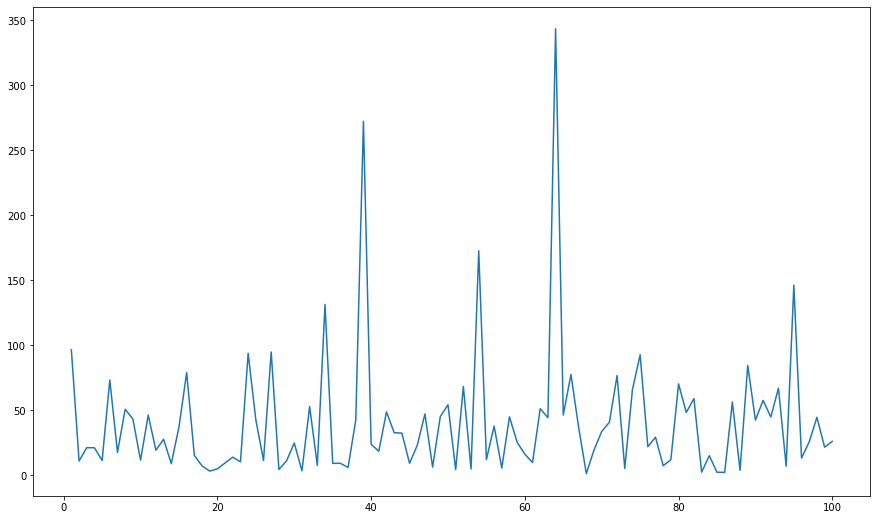

In [122]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(e[:100], l_item[:100])
plt.show()

In [123]:
#Смотрим на результат предсказаний
outputs = model(X_test)
for i in range(40, 46):
    print(outputs[i], y_test[i])   
    
#Ошибка через loss

print('w', model[0].weight.data)
print('b', model[0].bias.data)
print("square loss:", np.sqrt(loss(outputs, y_test.view(-1, 1)).detach().numpy()))


tensor([14.8612], grad_fn=<SelectBackward0>) tensor(19.7000)
tensor([31.8559], grad_fn=<SelectBackward0>) tensor(28.2000)
tensor([41.6623], grad_fn=<SelectBackward0>) tensor(50.)
tensor([18.1330], grad_fn=<SelectBackward0>) tensor(17.4000)
tensor([26.5808], grad_fn=<SelectBackward0>) tensor(22.6000)
tensor([19.6105], grad_fn=<SelectBackward0>) tensor(15.1000)
w tensor([[-0.1274,  0.0544,  0.0352,  0.5262,  0.1988,  4.4675,  0.0138, -0.6784,
          0.1218, -0.0052, -0.1958,  0.0212, -0.5937]])
b tensor([0.4424])
square loss: 5.2328167


#### 2. ** Реализовать наивный баесовский классификатор для MNIST (взяв всего 2 цифры “1” и “2”) сравнить с sclearn’овским

In [812]:
def transform(data):
    data = torch.tensor(data.getdata(), dtype=torch.float32)
    return torch.floor(data / 128.).squeeze(axis=-1)

In [813]:
mnist_train = tv.datasets.MNIST('.', train=True, transform=transform, download=True)
mnist_test  = tv.datasets.MNIST('.', train=False, transform=transform, download=True)

In [814]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [844]:
# Загружаем класс 1
x_1_train = mnist_train.data[mnist_train.train_labels==1]
x_1_train = x_1_train.reshape(6742, 784)
x_1_train.shape

torch.Size([6742, 784])

In [845]:
# Загружаем класс 2
x_2_train = mnist_train.data[mnist_train.train_labels==2]
x_2_train = x_2_train.reshape(5958, 784)
x_2_train.shape

torch.Size([5958, 784])

In [846]:
# Считаем мат. ожидание и дисперсию по каждому классу
x_1_mean = ((x_1_train.float()).mean(axis=0))
x_1_var =  (((x_1_train).float().var(axis=0)))+1000
x_2_mean = ((x_2_train.float()).mean(axis=0))
x_2_var =  (((x_2_mean).float().var(axis=0)))+1000

In [847]:
# Считаем вероятность влияния априорную вероятность (Р (призанки|класс))
result1 = []
for i in range(x_1_train.shape[0]):
    classifier = []
    sample1 = x_1_train[i]
    prob1 = (torch.exp(-(sample1 - x_1_mean)/(2 * x_1_var))/ torch.sqrt(2 * torch.pi * x_1_var))   
    result1+= [prob1.sum().item()]

result1 = np.array(result1).mean()

result2=[]
for i in range(x_2_train.shape[0]):
    classifier = []
    sample2 = x_2_train[i]
    prob2 = (torch.exp(-(sample2 - x_2_mean)/(2 * x_2_var))/ torch.sqrt(2 * torch.pi * x_2_var))
    result2+=[prob2.sum().item()]  
result2 =np.array(result2).mean()


In [848]:
#  Загружаем тестовый набор
X_test = torch.cat((mnist_test.data[mnist_test.test_labels==1], mnist_test.data[mnist_test.test_labels==2]), dim=0)
y_test = []
for i in range(len(mnist_test)):
    if mnist_test[i][1] == 1 or mnist_test[i][1] == 2:    
        y_test.append(mnist_test[i][1])
        
X_test.shape, len(y_test)

(torch.Size([2167, 28, 28]), 2167)

In [857]:
# Проверяем на тестовом наборе
pred =[]
pred_true = []
for i in range(X_test.shape[0]):
    classifier = []
    sample = X_test[i].reshape(784)
    prob1 = (torch.exp(-(sample - x_1_mean)/(2 * x_1_var))/ torch.sqrt(2 * torch.pi * x_1_var))
    prob2 = (torch.exp(-(sample - x_2_mean)/(2 * x_2_var))/ torch.sqrt(2 * torch.pi * x_2_var))
       
    classifier.append(prob1.sum()-result1)
    classifier.append(prob2.sum()-result2)
    
    
    if classifier[0]  <= 0.0026:
        pred.append(1)
    else: 
        pred.append(2)
    pred_true.append(y_test[i])   
       
n = np.array(pred) - np.array(pred_true)
   
print("Test Accuracy:", round((len(n) - np.count_nonzero(n))/len(n)*100),'%')
    

Test Accuracy: 53 %


#### Сравнение с sklearn

In [858]:
X_train = torch.cat((x_1_train, x_2_train), dim=0)

In [859]:
X_train.shape, len(y_train)

(torch.Size([12700, 784]), 12700)

In [866]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()

# Train the model using the training sets 
model2.fit(X_train, y_train)

#Predict Output 
predicted= model2.score(X_test.reshape(2167, 784), y_test)
print("Test Accuracy:", round(predicted*100), '%') 


Test Accuracy: 53 %
